In [10]:
import pandas as pd

## !cd planet_conduction ; python ini_Tprofile.py
DeltaT = 0.1
tresh = 2e-3
i = 0
while DeltaT > tresh and i < 10:
    i += 1
    print('---------')
    !cd planet_profile ; gfortran -o terminal.out planet_profile.f90 Internal_structure.f90 Melt_models.f90 Rheology.f90
    !cd planet_tides ; gfortran -o terminal.out planet_tide.f90 k2_Dt.f90 Pot_Strain_Func.f90 Tidal_heating_map_output.f90 ; ./terminal.out
    !cd planet_conduction ; python3 planet_conduction.py
    
    f = open("planet_conduction/DeltaT.txt", "r")
    DeltaT = float(f.read())
    print("DT = ", DeltaT)
    f.close()

___
## Flux Map 

In [78]:
file = open("Outputs/Tcrust_profile.txt","r")
Tprofile = file.read().split('\n')[:-1]
Tprofile = [float(T) for T in Tprofile]
flux = (-Tprofile[0]+Tprofile[1])#€/5000
file.close()
fluxytr're

-2.5245143329098028

In [14]:
%matplotlib inline  
#%matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import scipy.integrate as integrate

In [71]:
Flux_matrix = np.zeros((5,12))

In [1]:
Flux_matrix[0] = [0,0,0,-25,-43.6,-48,-50,-50,-50,-50,-50,-50]
Flux_matrix[1] = [0,0,0,0,0,0,-5,-27,-38,-44,-50,-50] 
Flux_matrix[2] = [0,0,0,0,0,0,0,0,0,-16.98,-47.638,-50]
Flux_matrix[3] = [0,0,0,0,0,0,0,0,0,0,-41.33,-49.5]
Flux_matrix[4] = [0,0,0,0,0,0,0,0,0,0,-31.89,-50]

NameError: name 'Flux_matrix' is not defined

In [73]:
#Flux_matrix = 3*Flux_matrix/2000

In [74]:
Ecc = [0.01, 0.05,0.1,0.15,0.2]

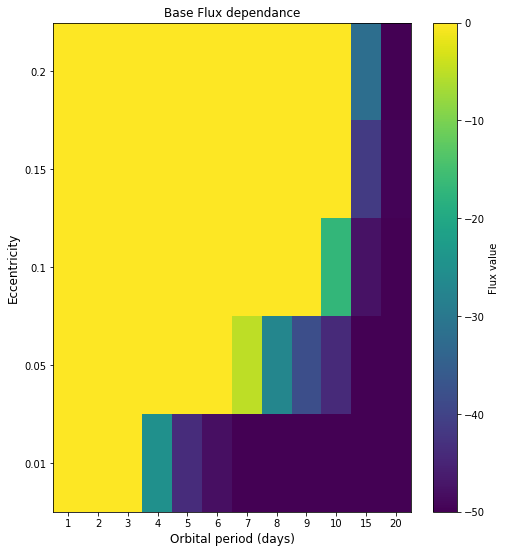

In [76]:
# Plot
fig, ax = plt.subplots(figsize=(8,9))
im=ax.imshow(Flux_matrix, origin='lower',aspect="auto")

ax.set_yticks([k for k in range(Flux_matrix.shape[0])])
ax.set_yticklabels(Ecc)
ax.set_xticks([k for k in range(Flux_matrix.shape[1])])
ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10,15,20])

plt.ylabel("Eccentricity", fontsize=12)
plt.xlabel("Orbital period (days)",fontsize=12)
plt.title("Base Flux dependance")
fig.colorbar(im,ax=ax,label='Flux value')
plt.savefig("H-frequency_map.pdf")

---
### Zeta Coefficient influence on Htide

In [26]:
Ecc = np.array([k*0.005 for k in range(1,101)])
X = [k for k in range(100)]

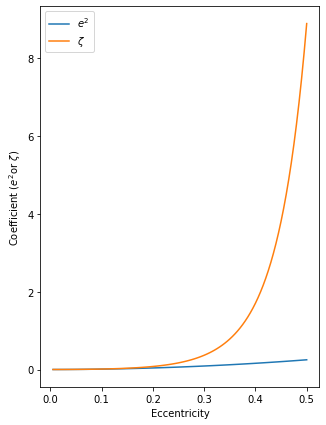

In [38]:
fig, ax = plt.subplots(figsize=(5,7))
ax.plot(Ecc,Ecc**2,label='$e^2$')
ax.plot(Ecc,Zeta,label='$\zeta$')
plt.legend()
ax.set_ylabel("Coefficient ($e^2$or $\zeta$) ")
ax.set_xlabel("Eccentricity")
plt.savefig("zeta_ecc2.png")
plt.show()

In [8]:
Zeta =  [  2.5011250739281898e-5, 1.0018011445611652e-4,2.2591259539617159e-4,4.0288760371637311e-4
,6.3206027621642846e-4
,9.1466695769681916e-4
,1.2522309388190989e-3
,1.6465701765495666e-3
,2.0998067151982158e-3
,2.6143769049102317e-3
,3.1930441775697704e-3
,3.8389111518700725e-3
,4.5554378483250169e-3
,5.3464581130709399e-3
,6.2161963674505216e-3
,7.1692960358140101e-3
,8.2108349781944145e-3
,9.3463548358890813e-3
,1.0581895258935325e-2
,1.1924012924290461e-2
,1.3379830426616446e-2
,1.4957059880689405e-2
,1.6664048636992834e-2
,1.8509831840972324e-2
,2.0504165168718613e-2
,2.2657583610612930e-2
,2.4981465161898087e-2
,2.7488091119597657e-2
,3.0190685358114422e-2
,3.3103531660680474e-2
,3.6242032922928880e-2
,3.9622765814948446e-2
,4.3263629714295093e-2
,4.7183923007602158e-2
,5.1404414098609963e-2
,5.5947530421103731e-2
,6.0837457026815811e-2
,6.6100229063100535e-2
,7.1763971867589427e-2
,7.7859009928080369e-2
,8.4418081918323840e-2
,9.1476457801716982e-2
,9.9072270030558462e-2,
0.10724669524378433,
  0.11604412792861718,
  0.12551260317747154,
  0.13570403440198003,
  0.14667444238558497,
  0.15848449650099361,
  0.17119982707294934,
  0.18489132881416998,
  0.19963585603464884,
  0.21551658585764849,
  0.23262361465413783,
  0.25105468486158045,
  0.27091540884523269,
  0.29232066229465781,
  0.31539495930743022,
  0.34027344212942257,
  0.36710285118854036,
  0.39604276934626537,
  0.42726608979905734,
  0.46096133595365840,
  0.49733340024034511,
  0.53660526763627270,
  0.57901973096203596,
  0.62484128117145288,
  0.67435849858863950,
  0.72788515081923577,
  0.78576450051499491,
  0.84837095505601690,
  0.91611345306772329,
  0.98943889735937374,
1.0688364483342441,
1.1548398071768187,
1.2480347205488820,
1.3490623094302392,
1.4586252784761538,
1.5774943115518774,
1.7065151850193219,
1.8466175557146802,
1.9988203767176658,
2.1642467332449300,
2.3441315492889818,
2.5398346450091402,
2.7528544369299790,
2.9848447085574952,
3.2376261330511862,
3.5132137920337181,
3.8138333531121775,
4.1419466319978229,
4.5002788370747959,
4.8918516638487919,
5.3200082929552481,
5.7884662926756105,
6.3013524404639769,
6.8632545981706459,
7.4792778641704212,
8.1551081582866942,
8.8970889386166778]
